# WeatherPy


# Data Analysis:

1)

2)

3)

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed, skip cities not found


In [35]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key 
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=9d88a4e32284086ca01a89386c890bf8'

In [54]:
# set up lists to hold reponse info
city_names = []
longitudes = []
latitudes = []
max_temps = []
humidities = []
cloudiness1 = []
wind_speeds = []
countries = []
dates = []
#city_ids = []
count = 0

print(f"Beginning Data Retrieval: \n")
print(f"------------------------\n" )
# Loop through the list of cities and perform a request for data on each

for city in cities:
    city_url = query_url + "&q=" + city
    count += 1 
# Get weather data
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

# Try to grab the city name and id if they are available in the weather API
    try:
        
        city_name = weather_json['name']
        longitude = weather_json['coord']['lon']
        latitude = weather_json['coord']['lat']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        #city_id = weather_json['id']
        
        city_names.append(city_name)
        longitudes.append(longitude)
        latitudes.append(latitude)
        max_temps.append(max_temp)
        humidities.append(humidity)
        cloudiness1.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)
        #city_ids.append(city_id)

        print(f"Processing Record {count} | {city_name}")
        
# Handle exceptions for a city that is not available in the weather API
    except:
        # Append null values
        print(f"City not found. Skipping...")
        pass
 

Beginning Data Retrieval: 

------------------------

Processing Record 1 | Ushuaia
Processing Record 2 | Butaritari
Processing Record 3 | Inta
Processing Record 4 | Lere
Processing Record 5 | Hokitika
Processing Record 6 | Mataura
Processing Record 7 | Antofagasta
Processing Record 8 | Kapaa
Processing Record 9 | Panórama
Processing Record 10 | Punta Arenas
Processing Record 11 | Bengkulu
Processing Record 12 | Port Alfred
Processing Record 13 | New Norfolk
Processing Record 14 | Saint-Philippe
Processing Record 15 | Bluff
Processing Record 16 | Hithadhoo
Processing Record 17 | Pevek
Processing Record 18 | Upernavik
Processing Record 19 | Rikitea
Processing Record 20 | Lorengau
Processing Record 21 | Severo-Kuril'sk
Processing Record 22 | Busselton
Processing Record 23 | Kavieng
Processing Record 24 | Tipp City
Processing Record 25 | Puerto Madero
Processing Record 26 | Ostrovnoy
Processing Record 27 | Avarua
Processing Record 28 | Tasiilaq
Processing Record 29 | Bredasdorp
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
# create a data frame 
weather_dict = {
    "City": city_names,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudiness1,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,274.15,80,40,8.70,AR,1594687344
1,Butaritari,3.07,172.79,300.25,74,89,0.89,KI,1594687344
2,Inta,66.03,60.17,284.26,73,2,5.18,RU,1594687344
3,Lere,10.39,8.57,293.95,93,100,3.03,NG,1594687344
4,Hokitika,-42.72,170.97,284.48,63,100,1.77,NZ,1594687344
...,...,...,...,...,...,...,...,...,...
541,Acarí,-15.43,-74.62,290.50,58,17,1.14,PE,1594687414
542,Xining,36.62,101.77,289.97,61,0,1.09,CN,1594687144
543,Sosnovka,56.26,51.28,294.25,94,25,3.82,RU,1594687415
544,Lavrentiya,65.58,-171.00,282.58,69,87,2.71,RU,1594687415


In [52]:
# export to csv
weather_data.to_csv (r'C:\Users\cdfen\Documents\Python-API-Challenge\Weatherpy\weatherdf.csv', index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.


In [71]:
# create a dataframe to see if there are any humidity values over 100
humidity_100plus = weather_data.loc[weather_data["Humidity"] > 100]
humidity_100plus

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# No values of humidity are over 100
# no need to create a new 'clean' dataframe, can utilize weather_data above and already exported csv file

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

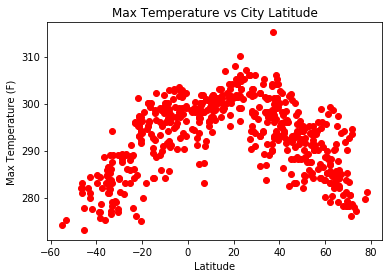

In [77]:
# Create a Scatter Plot for temperature vs latitude 
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs City Latitude')
plt.show()

# Analysis:



## Humidity vs. Latitude Plot

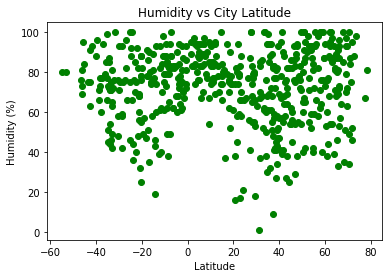

In [78]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, color='g')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs City Latitude')
plt.show()

# Analysis:



## Cloudiness vs. Latitude Plot

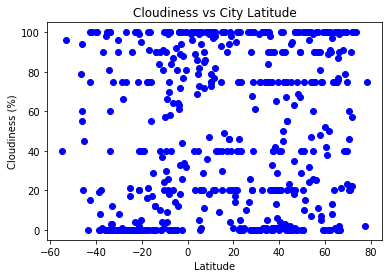

In [79]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, color='b')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs City Latitude')
plt.show()

## Wind Speed vs. Latitude Plot

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

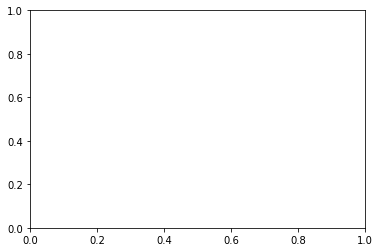

In [80]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, color='o')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs City Latitude')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression